In [1]:
# watch this: https://www.youtube.com/watch?v=iFTWM7HV2UI
# your cleaned data after you complete this analysis: 
# upload to: https://docs.google.com/forms/d/e/1FAIpQLScVuy4aSiSSpLfUOxbmutWtcUidfkzPDc-C0J2gy6Y8TXqeHQ/viewform

import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('history_cleaned.csv')
df.shape

(7479, 2)

In [3]:
df.head()

,Time,domain
0,2021-09-27 23:16:48,www.youtube.com
1,2021-09-27 23:16:48,www.youtube.com
2,2021-09-27 23:07:45,hangouts.google.com
3,2021-09-27 23:07:45,hangouts.google.com
4,2021-09-27 23:01:12,mail.google.com


In [4]:
df.tail()

,Time,domain
7474,1600-12-31 19:00:00,github.com
7475,1600-12-31 19:00:00,www.troweprice.com
7476,1600-12-31 19:00:00,madewithml.com
7477,1600-12-31 19:00:00,gist.github.com
7478,1600-12-31 19:00:00,developer.tdameritrade.com


In [5]:
df.isna().sum()

Time       0
domain    17
dtype: int64

In [6]:
df.dropna( inplace=True)

In [7]:
df.dtypes

Time      object
domain    object
dtype: object

In [8]:
# time column is string and string date is starting with YYYY, so I can do string compares
sum(df['Time'] < '1900') 

34

In [9]:
# I filter and get a copy, so I will not work on a slice, this will be a new dataframe. (essentially losing 1900 data points)
df = df[df.Time > '1900'].copy() 

In [10]:
df['Time'] = pd.to_datetime(df['Time'])

In [11]:
# df['domain'] = df['domain'].astype(str)

In [12]:
df.dtypes

Time      datetime64[ns]
domain            object
dtype: object

In [13]:
df.head()

,Time,domain
0,2021-09-27 23:16:48,www.youtube.com
1,2021-09-27 23:16:48,www.youtube.com
2,2021-09-27 23:07:45,hangouts.google.com
3,2021-09-27 23:07:45,hangouts.google.com
4,2021-09-27 23:01:12,mail.google.com


In [16]:
df['domain'].value_counts()[:50]

www.facebook.com                 1297
www.google.com                   1151
www.zillow.com                    505
mail.google.com                   450
www.redfin.com                    373
www.netflix.com                   214
hangouts.google.com               212
www.amazon.com                    208
www.homesnap.com                  185
www.imdb.com                      140
secure.bankofamerica.com          124
www.youtube.com                   121
www.airbnb.com                    103
www.udemy.com                      95
connect.secure.wellsfargo.com      82
leetcode.com                       75
github.com                         56
cityprotect.com                    53
niksgames.com                      48
online.citi.com                    47
invest.ameritrade.com              46
www.disneyplus.com                 42
www.linkedin.com                   37
olui2.fs.ml.com                    35
www.priceline.com                  34
messages.google.com                33
www.nacalynx

<AxesSubplot:>

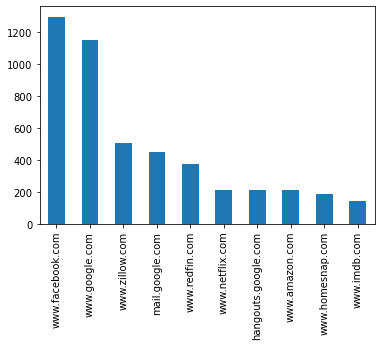

In [17]:
# top 10 sites that I visisted
df['domain'].value_counts()[:10].plot(kind='bar')

In [18]:
hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
hourly_counts

Time
0     966
1     412
2     200
3     109
4     144
5      23
6     106
7      42
8      38
9      48
10    104
11     41
12    185
13    325
14    293
15    333
16    121
17    251
18    239
19    600
20    608
21    534
22    813
23    893
Name: domain, dtype: int64

<AxesSubplot:xlabel='Time'>

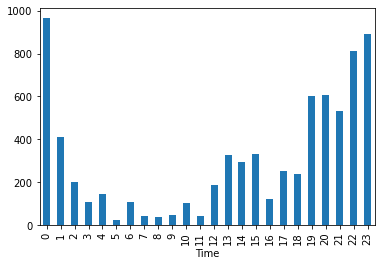

In [19]:
hourly_counts.plot.bar()

In [21]:
df['Day'] = [ d.day_name() for d in df['Time']]
df['DayIndex'] = [ d.dayofweek for d in df['Time']]
df.head()

,Time,domain,Day,DayIndex
0,2021-09-27 23:16:48,www.youtube.com,Monday,0
1,2021-09-27 23:16:48,www.youtube.com,Monday,0
2,2021-09-27 23:07:45,hangouts.google.com,Monday,0
3,2021-09-27 23:07:45,hangouts.google.com,Monday,0
4,2021-09-27 23:01:12,mail.google.com,Monday,0


In [22]:
df['Day'].value_counts()

Thursday     1510
Monday       1467
Saturday     1183
Sunday       1151
Wednesday     923
Tuesday       816
Friday        378
Name: Day, dtype: int64

In [23]:
days_sorted = df['DayIndex'].value_counts().sort_index()
days_sorted

0    1467
1     816
2     923
3    1510
4     378
5    1183
6    1151
Name: DayIndex, dtype: int64

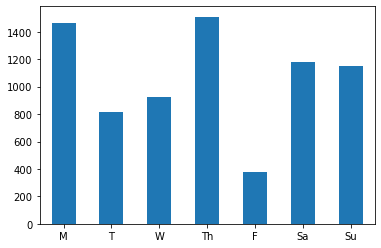

In [24]:
days_sorted.plot.bar()
plt.xticks(days_sorted.index, ['M', 'T', 'W','Th', 'F', 'Sa', 'Su'], rotation=0)

plt.show()

In [25]:
def is_weekend(day): 
    return day in ['Saturday', 'Sunday']


df['isWeekend'] = [ is_weekend(i) for i in df['Day']]
df.head()

,Time,domain,Day,DayIndex,isWeekend
0,2021-09-27 23:16:48,www.youtube.com,Monday,0,False
1,2021-09-27 23:16:48,www.youtube.com,Monday,0,False
2,2021-09-27 23:07:45,hangouts.google.com,Monday,0,False
3,2021-09-27 23:07:45,hangouts.google.com,Monday,0,False
4,2021-09-27 23:01:12,mail.google.com,Monday,0,False


In [26]:
weekend = df[ df['isWeekend'] == True ]

weekday = df[ df['isWeekend'] == False ]


In [27]:
weekend.head()

,Time,domain,Day,DayIndex,isWeekend
112,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
113,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
114,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
115,2021-09-26 01:33:58,www.facebook.com,Sunday,6,True
116,2021-09-26 01:33:44,mail.google.com,Sunday,6,True


In [28]:
weekday['domain'].value_counts()[:5]

www.google.com      903
www.facebook.com    852
mail.google.com     337
www.zillow.com      319
www.redfin.com      231
Name: domain, dtype: int64

In [29]:
weekend['domain'].value_counts()[:5]

www.facebook.com    445
www.google.com      248
www.zillow.com      186
www.redfin.com      142
mail.google.com     113
Name: domain, dtype: int64

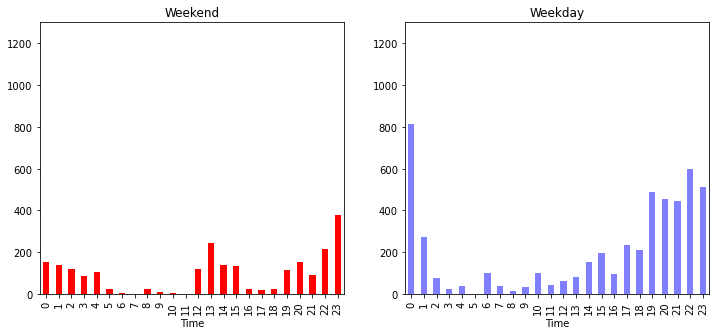

In [30]:
def show_stats(df, color, alpha=1, title='', fig=None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
            
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha)
    plt.title(title)
    plt.ylim([0, 1300])
    

plt.figure(figsize=(12, 5))
show_stats( weekend, 'red', 1, 'Weekend', 1)
    
show_stats( weekday, 'blue', 0.5, 'Weekday', 2)

plt.show()


In [ ]:
# be skeptical about your data!
# am I on computer a lot more on the weekdays 
# or it shows more simply because there are more weekdays 

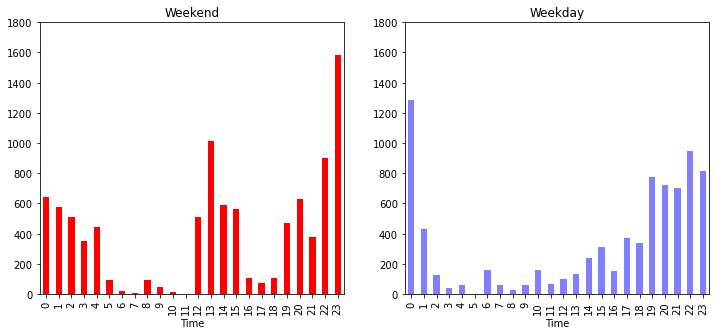

In [31]:
def show_stats(df, color, alpha=1, title='', fig=None, y_lim = None):
    hourly_counts = df.groupby(df.Time.dt.hour).domain.size()
    
    days_counts = df.Time.dt.date.nunique()
    
    # fill in the missing hours
    for h in range(24):
        if h not in hourly_counts:
            hourly_counts[h]=0 # I initially didn't do this and hours were not lining up
        else: 
            hourly_counts[h] = hourly_counts[h] * 100.0 /  days_counts # I multiplied by 100.0 to make it float and also not to loose decimals
           
    if fig != None:
        plt.subplot(1,2, fig)
        
    hourly_counts.sort_index().plot.bar(color=color, alpha=alpha, title=title)
    
    if y_lim != None:
        plt.ylim(y_lim)


plt.figure(figsize=(12, 5))

y_lim=[0, 1800]
show_stats(weekend, 'red', 1, 'Weekend',fig=1, y_lim=y_lim)
    
show_stats(weekday, 'blue', 0.5, 'Weekday',fig=2, y_lim=y_lim)

plt.show()

In [32]:
df['domain'].value_counts()[:10]

www.facebook.com       1297
www.google.com         1151
www.zillow.com          505
mail.google.com         450
www.redfin.com          373
www.netflix.com         214
hangouts.google.com     212
www.amazon.com          208
www.homesnap.com        185
www.imdb.com            140
Name: domain, dtype: int64

In [38]:
def get_data_for_domain(val):
    return df[df['domain'].str.lower().str.contains(val.lower(), regex=True)]

# get_data_for_domain('youtube')

In [39]:
def show_domain_stats(domain, color='blue', alpha=1):
    data = get_data_for_domain(domain)
    show_stats(data, color, alpha)
    return data

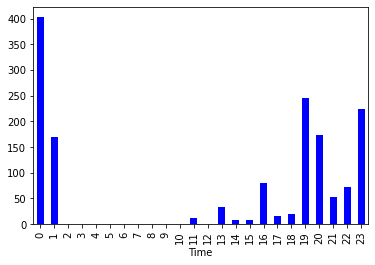

In [40]:
_= show_domain_stats('redfin', 'blue')

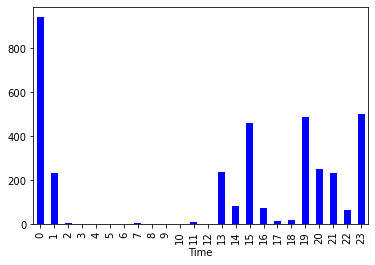

In [41]:
_= show_domain_stats('redfin|zillow|homesnap', 'blue')

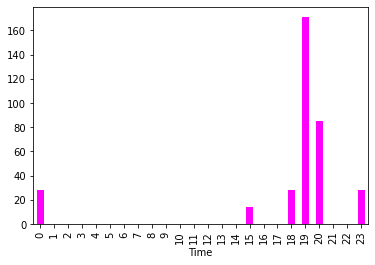

In [42]:
_ = show_domain_stats('stackover', 'magenta')


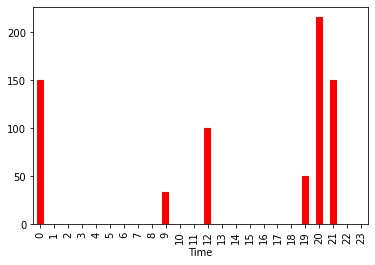

In [43]:
_ = show_domain_stats('disney', 'red')

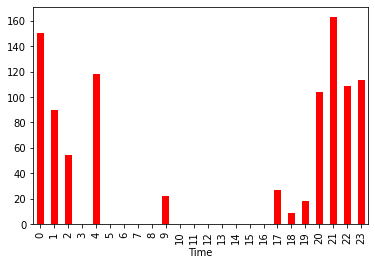

In [44]:
_ = show_domain_stats('netflix', 'red')

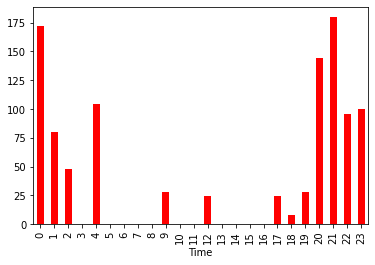

In [51]:
_ = show_domain_stats('netflix|disney|prime', 'red')

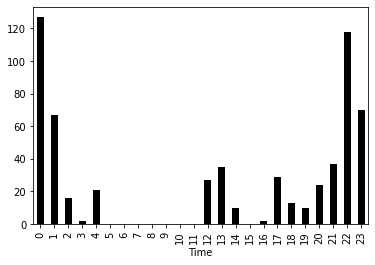

In [46]:
_=show_domain_stats('amazon', 'black')

### Based on data, what can we tell about this person?

1. Is this a work computer/personal computer?
1. Is he employed?
1. What is his interests?
1. Anything interesting? 

answer here